<a href="https://colab.research.google.com/github/gabrielmprata/MVP_Sprint01_Puc_Rio/blob/master/MVP_Analise_de_Dados_e_boas_praticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

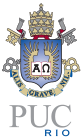 <font size="4"> **MVP de Análise de Dados e Boas Práticas**

---
>
**Pós-Graduação em Ciência de Dados e Analytics**
>
**Sprint 01**
>
**Aluno**: Gabriel Prata
>
**Data**: 29/03/2023
>
---

#**<font color=#FE8202> 1. Definição do problema**

A malha rodoviária é a principal forma de locomoção do país no que tange o deslocamento de pessoas, produtos, matérias primas, alimentos e combustível a curtas e longas distâncias.
>
Este trabalho visa mostrar através dos dados abertos disponibilizados pela Polícia Rodoviária Federal, dentre os 70.000 Km de rodovias onde atua, o impacto dos acidentes de trânsito e sua letalidade nas rodovias federais, tendo como período analisado o ano de 2020.
>
O Brasil é o terceiro país com mais mortes no trânsito, ficando atrás apenas da Índia e da China segundo o relatório Global Status Report on Road Safety da Organização Mundial de Saúde (OMS). 
>
Cerca de 82% dos acidentes de trânsito nas rodovias federais brasileiras, são com vítimas, tendo em vista esse grande percentual de vítimas, nesse estudo, queremos entender os fatores que contribuem para os acidentes acontecerem. 
>
Esse estudo tem como objetivo geral analisar o estado físico dos envolvidos, classificando o acidente de trânsito em "com vítimas" ou "sem vítimas", fazendo uso de **algoritmos de aprendizado de máquina supervisionado**.
>
O dataset conta com 30 atributos relacionados à caracterização do acidente, 4 atributos que classifica o estado das vítimas em, ilesos, feridos leve, feridos grave e mortos, e 1 variável que classifica o acidente em, sem vítimas, com vítimas feridas e com vitimas fatais. Essa ultima variável utilizaremos como alvo e as demais, serão analisadas para definir quais serão selecionadas como preditoras.
>
Para mais informações sobre o dataset, consulte: https://www.gov.br/prf/pt-br/acesso-a-informacao/dados-abertos/dicionario-de-dados


>**<font color=#FE8202> Dicionário de dados**

1.   **id**    -  Variável com valores numéricos, representando o identificador do acidente
2.   **pesid** - Variável com valores numéricos, representando o identificador da pessoa envolvida
3. **data_inversa** - Data da ocorrência no formato dd/mm/aaaa.
4. **dia_semana** - Dia da semana da ocorrência. Ex.: Segunda, terça, etc.
5. **horario** - Horário da ocorrência no formato hh:mm:ss.
6. **uf** - Unidade da Federação. Ex.: MG, SP, etc.
7. **br** - Variável com valores numéricos, representando o identificador da BR.
8. **km** - Identificação do quilômetro onde ocorreu o acidente, com valor mínimo de 0,1 km e com a casa decimal separada por ponto.
9. **municipio** - Nome do município de ocorrência do acidente.
10. **causa_acidente** - Identificação da causa principal do acidente.
11. **tipo_acidente** - Identificação do tipo de acidente. Ex.: Colisão frontal, etc.
12. **classificação_acidente** - Classificação quanto à gravidade do acidente.
13. **fase_dia** - Fase do dia no momento do acidente. Ex.: Amanhecer, Pleno dia, etc.
14. **sentido_via** - Sentido da via considerando o ponto de colisão: Crescente e decrescente.
15. **Condição_meteorologica** - Condição meteorologica no momento do acidente. Ex.: Céu claro, chuva, etc.
16. **tipo_pista** - Tipo da pista considerando a quantidade de faixas: Dupla. simples ou múltipla.
17. **tracado_pista** - Descrição do traçãdo da via.
18. **usu_solo** - Descrição sobre as características do local do acidente: Urbano=Sim;Rural=Não.
19. **id_veiculo** - Variável com valores numéricos, representando o identificador do veículo envolvido.
20. **tipo_veiculo** - Tipo do veículo conforme Art. 96 do CNT. Ex.: Automóvel, Caminhão, etc.
21. **marca** - Descrição da marca do veículo.
22. **ano_fabricacao_veiculo** - Ana de fabricação do veículo, formato aaaa.
23. **tipo_envolvido** - Tipo de envolvido no acidente conforme sua participação no evento. Ex.: condutor, passageiro, etc.
24. **estado_fisico** - Condição do envolvido conforme a gravidade das lesões.Ex.:morto,feridoleve,etc.
25. **idade** - Idade do envolvido. O código "-1" indica que não foi possivel coletar a informação.
26. **sexo** - Sexo do envolvido. O valor "invalido" indica que não foi possivel coletar a informação.
27. **ilesos** - Valor binário que identifica se o envolvido foi classificado como ileso.
28. **feridos_leves** - Valor binário que identifica se o envolvido foi classificado como ferido leve.
29. **feridos_graves** - Valor binário que identifica se o envolvido foi classificado como ferido grave.
30. **mortos** - Valor binário que identifica se o envolvido foi classificado como morto.
31. **latitude** - Latitude do local do acidente em formato geodésico decimal.
32. **longitude** - Longitude do local do acidente em formato geodésico decimal.
33. **regional** - Não definido no dicionário de dados fornecido pela PRF.
34. **delegacia** - Não definido no dicionário de dados fornecido pela PRF.
35. **uop** - Não definido no dicionário de dados fornecido pela PRF.



#**<font color=#FE8202> 2. Carga de Dados**

Nesse tópico iremos importar o dataset que está armazenado no GitHub, separado por ano, no formato CSV, com cabeçalho e separado por ponto e vírgula(;).
>
Iremos utilizar o pacote Pandas, para carregar esse arquivo, através de uma URL, e armazenaremos os dados em um **dataframe**(matrizes multidimensionais similares a uma tabela de dados relacionais, com linhas e colunas rotuladas).
>
Para isso, utilizaremos o método read_csv()

In [1]:
# Importando todas as bibliotecas que iremos utilizar no projeto
# Importação de pacotes
import pandas as pd
import numpy as np
import missingno as ms # para tratamento de missings

#bibliotecas para visualização de dados
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

#importar a biblioteca para usar a Distribuição Binomial de Bernoulli
from scipy.stats import bernoulli


In [2]:
# importando dados de uma url para um dataframe

# URL de importação
url  = "https://raw.githubusercontent.com/gabrielmprata/MVP_Sprint01_Puc_Rio/master/acidentes2019.csv"
url2 = "https://raw.githubusercontent.com/gabrielmprata/MVP_Sprint01_Puc_Rio/master/acidentes2020.csv"

# Carga do dataset para o Pandas dataframe
acidentes_2019 = pd.read_csv(url, encoding="Latin 1", sep=';')
acidentes_2020 = pd.read_csv(url2, encoding="Latin 1", sep=';')


In [3]:
# Concatenar os dataframes de 2019 e 2020 em um único dataframe.
# Utilizaremos o método "concat"

acidentes = pd.concat([acidentes_2019, acidentes_2020], sort=False, ignore_index=True)

# Apagando os dataframes que não iremos mais utilizar
del acidentes_2020
del acidentes_2019

In [4]:
# verificando se é um dataframe
type(acidentes)

pandas.core.frame.DataFrame

In [5]:
# Exibe as 5 primeiras linhas (Default do comando head)
acidentes.head()

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,...,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop
0,182256.0,403856.0,2019-01-01,terça-feira,04:00:00,CE,116.0,"136,9",RUSSAS,Animais na Pista,...,Masculino,1,0,0,0,"-4,766018","-38,056034",SPRF-CE,DEL03-CE,UOP01-DEL03-CE
1,182263.0,402859.0,2019-01-01,terça-feira,05:00:00,MT,158.0,"599,5",AGUA BOA,Defeito Mecânico no Veículo,...,Masculino,1,0,0,0,"-14,319","-52,169",SPRF-MT,DEL07-MT,UOP02-DEL07-MT
2,182277.0,402850.0,2019-01-01,terça-feira,10:00:00,PA,10.0,34,DOM ELISEU,Velocidade Incompatível,...,Masculino,1,0,0,0,"-4,15296734","-47,54608154",SPRF-PA,DEL02-PA,UOP02-DEL02-PA
3,182289.0,402431.0,2019-01-01,terça-feira,08:30:00,BA,101.0,13,RIO REAL,Ingestão de Álcool,...,Masculino,1,0,0,0,"-11,5896","-37,8761",SPRF-SE,DEL02-SE,UOP03-DEL02-SE
4,182307.0,402638.0,2019-01-01,terça-feira,13:50:00,BA,116.0,440,FEIRA DE SANTANA,Ingestão de Álcool,...,Masculino,0,1,0,0,"-12,344","-39,087",SPRF-BA,DEL02-BA,UOP01-DEL02-BA


###**<font color=#FE8202> 2.2. Dataset Regiões do Brasil**

As regiões do Brasil são os agrupamentos das unidades da federação em regiões com o propósito de ajudar interpretações estatísticas, implantar sistemas de gestão de funções públicas de interesse comum ou orientar a aplicação de políticas públicas dos governos federal e estadual. 
>
Essa divisão do Brasil foi elaborada pelo IBGE em 1970 e criou cinco regiões: Centro-Oeste, Nordeste, Norte, Sudeste e Sul.
>
No nosso trabalho, vamos enriquecer a informação, adicionando as regiões do Brasil nas analises.(Etapa de pre-processamento > Criação de recurso > Enriquecimento)
>
Para tal, vamos utilizar a API (Application Programming Interface) do IBGE, encontrada no pypi.org, que é o repositório oficial de bibliotecas criadas por terceiros para a linguagem Python.


In [6]:
# Instalando a biblioteca do IBGE
!pip install ibge

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
# Importando os pacotes  da biblioteca 
from ibge.localidades import *

In [8]:
# Função Estados() retorna um objeto do tipo ibge.localidades.Estados
dados = Estados()
type(dados)

ibge.localidades.Estados

In [9]:
# Transformar o tipo ibge.localidades.Estados em list
regiao = dados.json()
type(regiao)

list

In [10]:
#Exemplo
regiao[1]

{'id': 12,
 'sigla': 'AC',
 'nome': 'Acre',
 'regiao': {'id': 1, 'sigla': 'N', 'nome': 'Norte'}}

In [11]:
#pandas json_normalize ler a string JSON aninhada e devolver um DataFrame.
estados_br = pd.json_normalize(regiao)

In [12]:
# Mostra diversas informações do Dataframe em um único comando
estados_br.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            27 non-null     int64 
 1   sigla         27 non-null     object
 2   nome          27 non-null     object
 3   regiao.id     27 non-null     int64 
 4   regiao.sigla  27 non-null     object
 5   regiao.nome   27 non-null     object
dtypes: int64(2), object(4)
memory usage: 1.4+ KB


In [13]:
#excluir as colunas que não iremos utilizar
estados_br.drop(['id','nome', 'regiao.id', 'regiao.sigla'], axis=1, inplace = True)

In [14]:
estados_br.head()

,sigla,regiao.nome
0,RO,Norte
1,AC,Norte
2,AM,Norte
3,RR,Norte
4,PA,Norte


In [15]:
#renomear colunas
estados_br = estados_br.rename(columns={'sigla': 'uf',
                                'regiao.nome': 'regiao'
                                })

#**<font color=#FE8202> 3. Análise de Dados Inicial**

Nessa etapa iremos fazer a análise exploratória **inicial** de dados.
>
Uma etapa bem crítica, pois nesse primeiro momento, devemos compreender bem os dados.
>
Depois de entender melhor esses dados, na próxima etapa, seremos capazes de limpar, transformar e apresentar melhor os dados, assim como obter os melhores resultados possíveis nos algoritmos de Machine Learning.

###**<font color=#FE8202> 3.1. Estatísticas Descritivas**

Compreende a organização, o resumo e, descrever os dados, que podem ser expressos em tabelas e gráficos.
>
Veremos a seguir alguns comandos para exibir algumas estatísticas descritivas.
>
---



In [16]:
#	Quantidade de atributos e instâncias (linhas/colunas)
acidentes.shape

(310239, 35)

Um dataframe com 310.239 mil linhas e 35 colunas


---



In [17]:
# verificando os tipos de dados de cada coluna do dataframe
acidentes.dtypes

id                        float64
pesid                     float64
data_inversa               object
dia_semana                 object
horario                    object
uf                         object
br                        float64
km                         object
municipio                  object
causa_acidente             object
tipo_acidente              object
classificacao_acidente     object
fase_dia                   object
sentido_via                object
condicao_metereologica     object
tipo_pista                 object
tracado_via                object
uso_solo                   object
id_veiculo                  int64
tipo_veiculo               object
marca                      object
ano_fabricacao_veiculo    float64
tipo_envolvido             object
estado_fisico              object
idade                     float64
sexo                       object
ilesos                      int64
feridos_leves               int64
feridos_graves              int64
mortos        



---



In [18]:
# Mostra diversas informações do Dataframe em um único comando
acidentes.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310239 entries, 0 to 310238
Data columns (total 35 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      310239 non-null  float64
 1   pesid                   310237 non-null  float64
 2   data_inversa            310239 non-null  object 
 3   dia_semana              310239 non-null  object 
 4   horario                 310239 non-null  object 
 5   uf                      310239 non-null  object 
 6   br                      309599 non-null  float64
 7   km                      309599 non-null  object 
 8   municipio               310239 non-null  object 
 9   causa_acidente          310239 non-null  object 
 10  tipo_acidente           310212 non-null  object 
 11  classificacao_acidente  310239 non-null  object 
 12  fase_dia                310239 non-null  object 
 13  sentido_via             310239 non-null  object 
 14  condicao_metereologi


A função info() da biblioteca pandas, nos fornece um resumo do dataframe, sendo muito útil para ter uma visão geral do conjunto de dados. 
>
Usando o parâmetro memory_usage = “deep”, saberemos exatamente quanto de memória o dataframe está utilizando.
>
Sendo assim, depois dos processos de transformações de dados saberemos se tivemos algum ganho de memoria no dataframe.


O dataframe está ocupando cerca de 564 Megas de espaço.


---



In [19]:
# Exibe as 5 primeiras linhas (Default do comando head)
acidentes.head()

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,...,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop
0,182256.0,403856.0,2019-01-01,terça-feira,04:00:00,CE,116.0,"136,9",RUSSAS,Animais na Pista,...,Masculino,1,0,0,0,"-4,766018","-38,056034",SPRF-CE,DEL03-CE,UOP01-DEL03-CE
1,182263.0,402859.0,2019-01-01,terça-feira,05:00:00,MT,158.0,"599,5",AGUA BOA,Defeito Mecânico no Veículo,...,Masculino,1,0,0,0,"-14,319","-52,169",SPRF-MT,DEL07-MT,UOP02-DEL07-MT
2,182277.0,402850.0,2019-01-01,terça-feira,10:00:00,PA,10.0,34,DOM ELISEU,Velocidade Incompatível,...,Masculino,1,0,0,0,"-4,15296734","-47,54608154",SPRF-PA,DEL02-PA,UOP02-DEL02-PA
3,182289.0,402431.0,2019-01-01,terça-feira,08:30:00,BA,101.0,13,RIO REAL,Ingestão de Álcool,...,Masculino,1,0,0,0,"-11,5896","-37,8761",SPRF-SE,DEL02-SE,UOP03-DEL02-SE
4,182307.0,402638.0,2019-01-01,terça-feira,13:50:00,BA,116.0,440,FEIRA DE SANTANA,Ingestão de Álcool,...,Masculino,0,1,0,0,"-12,344","-39,087",SPRF-BA,DEL02-BA,UOP01-DEL02-BA


In [20]:
# Exibe as 5 últimas linhas (Default do comando tail)
acidentes.tail()

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,...,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop
310234,463900.0,1004448.0,2020-02-18,terça-feira,11:45:00,BA,101.0,315,PRESIDENTE TANCREDO NEVES,Ultrapassagem Indevida,...,Feminino,0,1,0,0,-13.29906,-39.34004,SPRF-BA,DEL05-BA,UOP03-DEL05-BA
310235,463900.0,1004447.0,2020-02-18,terça-feira,11:45:00,BA,101.0,315,PRESIDENTE TANCREDO NEVES,Ultrapassagem Indevida,...,Masculino,0,1,0,0,-13.29906,-39.34004,SPRF-BA,DEL05-BA,UOP03-DEL05-BA
310236,463900.0,1004446.0,2020-02-18,terça-feira,11:45:00,BA,101.0,315,PRESIDENTE TANCREDO NEVES,Ultrapassagem Indevida,...,Masculino,1,0,0,0,-13.29906,-39.34004,SPRF-BA,DEL05-BA,UOP03-DEL05-BA
310237,465902.0,1008121.0,2020-04-18,sábado,10:15:00,BA,242.0,"409,6",LAJEDINHO,Ultrapassagem Indevida,...,Feminino,0,0,1,0,-12.444242,-40.798419,SPRF-BA,DEL06-BA,UOP01-DEL06-BA
310238,465902.0,1008119.0,2020-04-18,sábado,10:15:00,BA,242.0,"409,6",LAJEDINHO,Ultrapassagem Indevida,...,Masculino,0,0,0,1,-12.444242,-40.798419,SPRF-BA,DEL06-BA,UOP01-DEL06-BA


Com a exibição das linhas, é mais fácil perceber que o processo de importação, considerou alguns atributos como Float ao inves de integer.
>
Nesse momento não irá interferir na exploração inicial de dados, depois na etpada de pre-processamento iremos modificar.
  

---



In [21]:
# Quantidade de valores únicos
acidentes.nunique()

id                        131132
pesid                     310237
data_inversa                 731
dia_semana                     7
horario                     1396
uf                            27
br                           118
km                          8840
municipio                   1869
causa_acidente                63
tipo_acidente                 20
classificacao_acidente         3
fase_dia                       4
sentido_via                    3
condicao_metereologica        10
tipo_pista                     3
tracado_via                   10
uso_solo                       2
id_veiculo                216089
tipo_veiculo                  25
marca                      10966
ano_fabricacao_veiculo        65
tipo_envolvido                 6
estado_fisico                  5
idade                        144
sexo                           4
ilesos                         2
feridos_leves                  2
feridos_graves                 2
mortos                         2
latitude  

Com o comando nunique() já podemos ter uma rápida noção da coerência dos atributos, como por exemplo:
>
Temos 144 valores diferentes no atributo idade, o que pode indicar alguma discrepância nos valores informados, ou seja, precisamos explorar mais esse atributo.
>


---




In [22]:
# Quantidade de nulls no dataframe
acidentes.isnull().sum()

id                            0
pesid                         2
data_inversa                  0
dia_semana                    0
horario                       0
uf                            0
br                          640
km                          640
municipio                     0
causa_acidente                0
tipo_acidente                27
classificacao_acidente        0
fase_dia                      0
sentido_via                   0
condicao_metereologica        0
tipo_pista                    0
tracado_via                   0
uso_solo                      0
id_veiculo                    0
tipo_veiculo                  0
marca                     16584
ano_fabricacao_veiculo    20369
tipo_envolvido                0
estado_fisico                 0
idade                     30708
sexo                          0
ilesos                        0
feridos_leves                 0
feridos_graves                0
mortos                        0
latitude                      0
longitud

Dos 35 atributos, 10 apresentam registros nulos, que deverão ser tratados na etapa de pre-processamento de dados.


---



Vamos verificar agora, se existe alguma duplicidade de registro.
>
Segundo a documentação do dataset existe o campo ID com o número único do registro do acidente, e o pesid com o número único que identifica a pessoa envolvida no registro do acidente.
>
Sendo assim devemos ter apenas 1 pesid distinto por ID de acidente, ou seja, só posso registrar uma vez a pessoa na ocorrência do acidente, mesmo que esse acidente tenha mais pessoas envolvidas.
>
Para essa analise iremos utilizar o método duplicated()

In [23]:
# Quantidade de registros duplicados
# subset - agrupa as colunas chaves
# keep='first' - Se primeiro, considera o primeiro valor como único e o resto como duplicado

acidentes.duplicated(subset=['id','pesid'], keep='first').sum()

0

O método retorna 0, o que indica que o dataframe não tem duplicidade de registros.


---



In [24]:
# Faz um resumo estatístico do dataset (média, desvio padrão, mínimo, máximo e os quartis)
acidentes.describe().round(2)

,id,pesid,br,id_veiculo,ano_fabricacao_veiculo,idade,ilesos,feridos_leves,feridos_graves,mortos
count,310239.00,310237.00,309599.00,310239.00,289870.00,279531.00,310239.00,310239.00,310239.00,310239.00
mean,257827.88,573651.46,215.59,460721.82,2009.66,39.51,0.42,0.37,0.12,0.03
std,43937.69,98355.00,131.64,79387.47,7.60,47.01,0.49,0.48,0.32,0.18
min,182210.00,402087.00,10.00,324863.00,1900.00,0.00,0.00,0.00,0.00,0.00
25%,220063.00,489437.00,101.00,392906.50,2007.00,27.00,0.00,0.00,0.00,0.00
50%,257636.00,573172.00,163.00,460061.00,2011.00,37.00,0.00,0.00,0.00,0.00
75%,295489.50,657550.00,343.00,528241.00,2015.00,48.00,1.00,1.00,0.00,0.00
max,466732.00,1010053.00,495.00,816458.00,2020.00,2019.00,1.00,1.00,1.00,1.00


###**<font color=#FE8202> 3.2. Distribuição dos atributos**

>Nessa etapa, iremos verificar a distribuição de cada atributo. Para ver se existe a necessidade de tomar alguma ação de transformações na etapa de preparação de dados.


---



Conforme visto anteriormente no resumo estatístico, o atributo idade, apresenta um valor máximo de 2.019, o que seria uma inconsistência.
>
Já a idade mínima com valor 0, representa bebês que ainda não completaram 1 ano.
>
Sendo assim, vou selecionar no dataframe acidentes todas as idades maiores que 100, agrupando e contando quantas vezes elas aparecem no dataframe.
>
Assim já teremos uma noção de quantas idades estão inconsistentes no dataframe.

In [25]:
# Verificar idades inconsistentes
# Cria um dataframe com idade > 100, agrupando e contando quantas vezes aparecem no dataframe
verifica_idade = acidentes[(acidentes['idade'] > 100)].groupby(["idade"])['id'].count().reset_index()
verifica_idade

,idade,id
0,101.0,1
1,103.0,1
2,106.0,2
3,110.0,1
4,118.0,3
5,119.0,41
6,120.0,32
7,131.0,1
8,133.0,1
9,135.0,3


Encontramos 44 idades com valores aparentementes inconsistentes, que serão tratados nas próximas etapas.
>
Outro ponto que iremos tratar é a conversão de float para integer.


---



Agora iremos analisar o atributo ano_fabricacao_veiculo, pois também apresentou valores inconsistentes.

In [26]:
# Verificar ano_fabricacao_veiculo inconsistentes

ano_veiculo = acidentes.groupby(["ano_fabricacao_veiculo"])['id'].count().reset_index()

# Exibe os valores em ordem crescente, pela coluna ano_fabricacao_veiculo
ano_veiculo.sort_values(by='ano_fabricacao_veiculo', ascending=True)

,ano_fabricacao_veiculo,id
0,1900.0,19
1,1951.0,1
2,1958.0,4
3,1959.0,1
4,1960.0,1
...,...,...
60,2016.0,11137
61,2017.0,13417
62,2018.0,19380
63,2019.0,14565


Como visto no resumo estatístico, o ano de fabricação minima, foi 1900, detalhamos e temos 19 registros com esse valor,  que seria insignificante.
>
Os demais anos parecem coerentes, porém, tudo indica que esse atributo não será utilizado em analises e nem em modelos de ML.


---




Por se tratar de um problema de **classificação**, vamos verificar a distribuição de frequência do **atributo alvo** *classificacao_acidente*.
>
Lembrando que ainda iremos tratar esse atributo, convertendo para binário, onde a classe 0 será o acidente "Sem vitimas"(classificacao_acidente == 'Sem Vítimas'), e os demais, com a classe 1 "Com vítimas".

In [27]:
# distribuição das classes
acidentes.groupby('classificacao_acidente').size().sort_values(ascending=False)

classificacao_acidente
Com Vítimas Feridas    237907
Sem Vítimas             43822
Com Vítimas Fatais      28510
dtype: int64

In [28]:
# Verificando o percentual da distribuição
acidentes.classificacao_acidente.value_counts(normalize=True) 

Com Vítimas Feridas    0.766851
Sem Vítimas            0.141252
Com Vítimas Fatais     0.091897
Name: classificacao_acidente, dtype: float64

A distribuição retrata a realidade do quadro de vítimas em acidentes de transito, sendo assim, não poderemos tratar esse atributo.


---



In [29]:
# Verificando o conteudo do atributo e a sua distribuição entre eles
# dia_semana (Dia da semana da ocorrência)
acidentes.dia_semana.value_counts().map('{:,d}'.format) 

domingo          52,821
sábado           52,035
sexta-feira      48,319
segunda-feira    41,728
quinta-feira     39,555
quarta-feira     38,140
terça-feira      37,641
Name: dia_semana, dtype: object

Para esse atributo, iremos na proxima etapa, criar uma nova coluna com o valor númerico referente ao dia da semana, utilizando função weekday.
>
Assim fica mais facil ordenar em um gráfico a sequencia semana, de segunda a domingo, proporcionando ao usuário um fácil leitura temporal.


---



In [30]:
# Verificando o conteudo do atributo e a sua distribuição entre eles
# fase_dia (Fase do dia no momento do acidente)
acidentes.fase_dia.value_counts().map('{:,d}'.format)

Pleno dia      171,203
Plena Noite    107,109
Anoitecer       17,935
Amanhecer       13,992
Name: fase_dia, dtype: object



---



In [31]:
# Verificando o conteudo do atributo e a sua distribuição entre eles
# condicao_metereologica (Condição meteorologica no momento do acidente)
acidentes.condicao_metereologica.value_counts().map('{:,d}'.format)

Céu Claro           183,002
Nublado              51,854
Chuva                33,789
Sol                  24,132
Garoa/Chuvisco       10,377
Ignorado              3,832
Nevoeiro/Neblina      2,644
Vento                   595
Granizo                  11
Neve                      3
Name: condicao_metereologica, dtype: object

In [32]:
#percentual da distribuição
(acidentes.condicao_metereologica.value_counts(normalize=True)*100).round(1)

Céu Claro           59.0
Nublado             16.7
Chuva               10.9
Sol                  7.8
Garoa/Chuvisco       3.3
Ignorado             1.2
Nevoeiro/Neblina     0.9
Vento                0.2
Granizo              0.0
Neve                 0.0
Name: condicao_metereologica, dtype: float64

Para esse atributo, temos o valor "Ignorado". Utilizando o parâmetro normalize=True, verificamos que o percentual dele é baixo, sendo assim não iremos tratá-lo.
>
Outro valor duvidoso é "Sol", como não tem nenhum detalhe no dicionário de dados, presumo que esse valor pode ser somado a "Céu Claro".
>
O valor “vento” tampouco é informativa, dado que esse fenômeno pode ocorrer em qualquer tipo de condição metereológica.


---



In [33]:
# Verificando o conteudo do atributo e a sua distribuição entre eles
# estado_fisico (Condição do envolvido conforme a gravidade das lesões)
acidentes.estado_fisico.value_counts().map('{:,d}'.format)

Ileso            129,570
Lesões Leves     114,940
Lesões Graves     35,762
Não Informado     19,336
Óbito             10,631
Name: estado_fisico, dtype: object

In [34]:
#percentual da distribuição
(acidentes.estado_fisico.value_counts(normalize=True)*100).round(1)

Ileso            41.8
Lesões Leves     37.0
Lesões Graves    11.5
Não Informado     6.2
Óbito             3.4
Name: estado_fisico, dtype: float64

Em cerca de 6% dos registros, a condição da lesão do envolvido não é informada(==Não Informado), é importante deixar esse valor, para que possa ser apurado uma melhoria na coleta dos dados.
>
Poderiamos criar um modelo de Machine Learning para classicar esses registros, mas não estaria presente nas analises a falta da coleta dessa informação tão importante.
>
Segundo a OMS, em casos de acidentes com Lesões Graves, e que a vítima é encaminhada para um hospital, a PRF tem que acompanhar o quadro por 30 dias, e caso haja óbito no hospital, a classificação deve ser alterada no registro da ocorrência.



---



In [35]:
# Verificando o conteudo do atributo e a sua distribuição entre eles
# sexo (Sexo do envolvido. O valor "invalido" indica que não foi possivel coletar a informação.)
acidentes.sexo.value_counts().map('{:,d}'.format)

Masculino        220,749
Feminino          68,336
Não Informado     19,336
Ignorado           1,818
Name: sexo, dtype: object

In [36]:
#percentual da distribuição
(acidentes.sexo.value_counts(normalize=True)*100).round(1)

Masculino        71.2
Feminino         22.0
Não Informado     6.2
Ignorado          0.6
Name: sexo, dtype: float64

Para esse atributo vamos somar os valores de "Não Informado" e "Ignorado" em um único valor.
>
E em seguida, utilizaremos a distribuição de **Bernoulli**, que será melhor explicada na próxima etapa.

---



In [37]:
# Verificando o conteudo do atributo e a sua distribuição entre eles
# tipo_veiculo (Tipo do veículo conforme Art. 96 do Código Naciona de trânsito.)
acidentes.tipo_veiculo.value_counts().map('{:,d}'.format)

Automóvel            134,584
Motocicleta           61,621
Caminhonete           27,422
Caminhão-trator       24,936
Caminhão              22,688
Ônibus                10,647
Camioneta              7,748
Motoneta               6,994
Bicicleta              4,343
Utilitário             3,693
Micro-ônibus           2,546
Outros                 1,332
Ciclomotor               901
Semireboque              254
Carroça-charrete         165
Trator de rodas          152
Reboque                   83
Não Informado             48
Triciclo                  39
Carro de mão              14
Trem-bonde                12
Trator misto               9
Quadriciclo                4
Trator de esteira          2
Chassi-plataforma          2
Name: tipo_veiculo, dtype: object



---



In [38]:
# Verificando o conteudo do atributo e a sua distribuição entre eles
# tipo_envolvido (Tipo de envolvido no acidente conforme sua participação no evento.)
acidentes.tipo_envolvido.value_counts().map('{:,d}'.format)

Condutor         216,048
Passageiro        80,873
Pedestre           6,792
Testemunha         6,441
Cavaleiro             83
Não Informado          2
Name: tipo_envolvido, dtype: object



---



In [39]:
# Verificando o conteudo do atributo e a sua distribuição entre eles
# tipo_pista (Tipo da pista considerando a quantidade de faixas.)
acidentes.tipo_pista.value_counts().map('{:,d}'.format)

Simples     164,286
Dupla       121,727
Múltipla     24,226
Name: tipo_pista, dtype: object



---



In [40]:
# Verificando o conteudo do atributo e a sua distribuição entre eles
# tracado_via (Tipo de envolvido no acidente conforme sua participação no evento.)
acidentes.tracado_via.value_counts().map('{:,d}'.format)

Reta                     192,411
Curva                     43,940
Não Informado             36,846
Interseção de vias        15,106
Desvio Temporário          8,735
Rotatória                  5,660
Retorno Regulamentado      3,603
Viaduto                    1,974
Ponte                      1,651
Túnel                        313
Name: tracado_via, dtype: object

In [41]:
#percentual da distribuição
(acidentes.tracado_via.value_counts(normalize=True)*100).round(1)

Reta                     62.0
Curva                    14.2
Não Informado            11.9
Interseção de vias        4.9
Desvio Temporário         2.8
Rotatória                 1.8
Retorno Regulamentado     1.2
Viaduto                   0.6
Ponte                     0.5
Túnel                     0.1
Name: tracado_via, dtype: float64

Temos cerca de 12% dos registros como "Não Informado".


---



In [42]:
# Verificando o conteudo do atributo e a sua distribuição entre eles
# uso_solo (Descrição sobre as características do local do acidente:Urbano=Sim; Rural=Não)
acidentes.uso_solo.value_counts().map('{:,d}'.format)

Não    173,294
Sim    136,945
Name: uso_solo, dtype: object

Esse atributo deverá ser eliminado.


---



In [43]:
# Verificando o conteudo do atributo e a sua distribuição entre eles
# sentido_via (Sentido da via considerando o ponto de colisão:Crescente e decrescente)
acidentes.sentido_via.value_counts().map('{:,d}'.format)

Crescente        165,466
Decrescente      144,133
Não Informado        640
Name: sentido_via, dtype: object

Esse atributo deverá ser eliminado.


---


In [44]:
# Verificando o conteudo do atributo e a sua distribuição entre eles
# causa_acidente (Identificação da causa principal do acidente)
acidentes.causa_acidente.value_counts().map('{:,d}'.format)

Falta de Atenção à Condução                          112,516
Desobediência às normas de trânsito pelo condutor     45,645
Velocidade Incompatível                               25,782
Ingestão de Álcool                                    23,723
Não guardar distância de segurança                    22,779
                                                      ...   
Condutor usando celular                                    2
Demais Fenômenos da natureza                               2
Curva acentuada                                            1
Acostamento em desnível                                    1
Pista em desnível                                          1
Name: causa_acidente, Length: 63, dtype: object



---



In [45]:
# Verificando o conteudo do atributo e a sua distribuição entre eles
# tipo_acidente (Identificação do tipo de acidente)
acidentes.tipo_acidente.value_counts().map('{:,d}'.format)

Colisão traseira                   70,354
Colisão transversal                44,743
Colisão lateral                    42,876
Saída de leito carroçável          38,594
Colisão frontal                    29,942
Colisão com objeto estático        16,477
Tombamento                         15,581
Atropelamento de Pedestre          14,941
Engavetamento                       9,035
Queda de ocupante de veículo        8,937
Capotamento                         8,245
Atropelamento de Animal             4,391
Incêndio                            3,172
Colisão com objeto em movimento     1,401
Danos eventuais                       817
Derramamento de carga                 585
Colisão com objeto                     51
Colisão lateral sentido oposto         31
Colisão lateral mesmo sentido          27
Eventos atípicos                       12
Name: tipo_acidente, dtype: object



---



###**<font color=#FE8202> 3.3. Visualizações Unimodais**

><font color=#FE8202>BoxPlot

Utilizaremos o gráfico de boxplot para comparar visualmente as distribuições das variáveis NUMÉRICAS agrupada conforme uma variável categórica.
>
Esse gráfico nos dá informação da assimetria da distribuição, indicação de outliers e da variabilidade dos dados por meio da amplitude. 
>
Consiste em 5 grupos: Mínimo, Primeiro quartil ou 25%, Mediana (segundo quartil) ou 50%, Terceiro quartil ou 75% e Máximo.

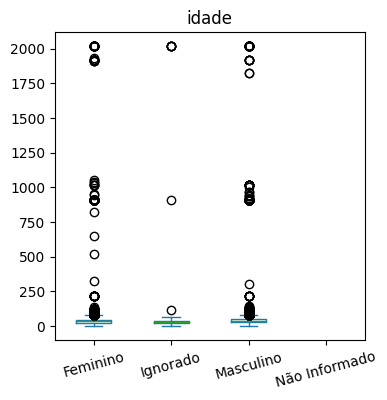

In [46]:
# Boxplot da biblioteca Pandas
# Atributo Idade, agrupado por Sexo
acidentes.plot.box(column="idade", by='sexo', figsize=(4, 4),rot=15)
plt.show()


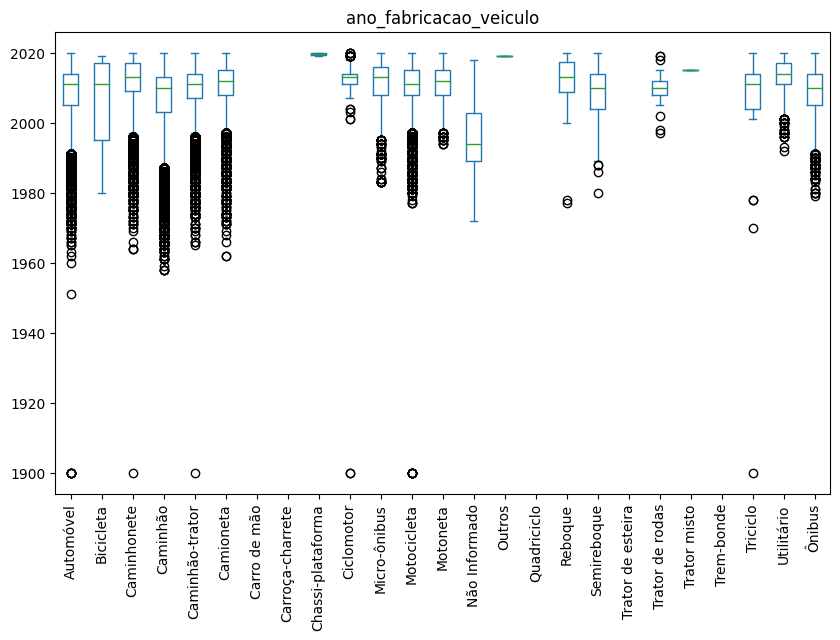

In [47]:
# Atributo ano fabricação veiculo, por tipo de veículo
acidentes.plot.box(column='ano_fabricacao_veiculo', by='tipo_veiculo', figsize=(10, 6), rot=90)
plt.show()

Para ambos os gráficos, decidimos agrupor por outra váriável que faça sentido, para melhor a apresentação do Boxplot.
>
O atributo idade nos mostra a presença de outliers, como já visto anteriormente. Para esse atributo, seria interessante, plotar o gráfico de BoxPlot depois de tratar as idades.
>
O atributo ano_fabricacao_veiculo, é possivel verificar o valor minímo de 1900, o que seria uma inconsistencia, e os demais valores estão coerentes.


---



Outra maneira de verificar a distribuição dos atributos é a utilização de um histograma.

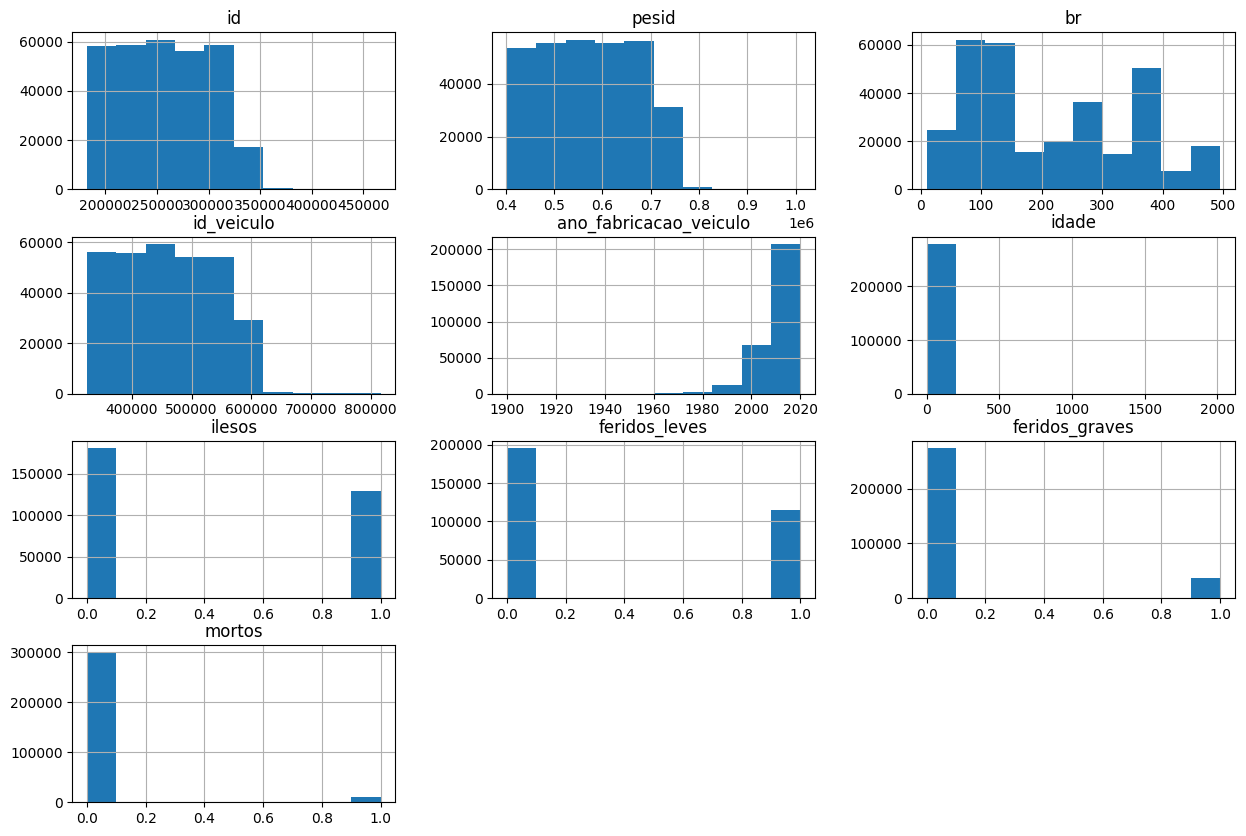

In [48]:
# Histograma
acidentes.hist(figsize = (15,10))
plt.show()

#**<font color=#FE8202> 4. Pré-Processamento de dados**

Após coletar e analisar os dados na etapa anterior, agora é o momento
de limpar, transformar e apresentar melhor os dados.
>
Assim poderemos obter, na próxima etapa, os melhores resultados possíveis nos algoritmos de
Machine Learning, ou simplesmente apresentar dados mais confiáveis para os clientes em soluções de
business intelligence.


---



Antes de começar, iremos fazer uma copia de segurança do dataframe original.

In [49]:
#Cópia de segurança
acidentes_ori = acidentes.copy()

In [184]:
acidentes = acidentes_ori.copy()

###**<font color=#FE8202> 4.1. Limpeza**

####**<font color=#FE8202> 4.1.1 Redundâncias**

Depois da análise de dados inicial, podemos eliminar colunas que não serão necessárias.

In [50]:
#Excluindo as colunas
acidentes.drop([ 'pesid','sentido_via','uso_solo',
		 'id_veiculo','marca','ano_fabricacao_veiculo',
		 'regional','delegacia','uop'],
		axis=1, inplace = True)

####**<font color=#FE8202> 4.1.2 Outliers**

Vamos tratar o atributo IDADE, que apresentou outliers/inconsistencias, além de Missings.
>
Para esse atributo, vamos aproveitar esse momento de transformação para tratamento de missings. 
>
Relembrando as idades exibidas na etapa 3.2:

In [51]:
#Dataframe criado na etapa 3.2 com as idades >100
verifica_idade.head(10)

,idade,id
0,101.0,1
1,103.0,1
2,106.0,2
3,110.0,1
4,118.0,3
5,119.0,41
6,120.0,32
7,131.0,1
8,133.0,1
9,135.0,3


Vamos assumir que até 110 anos, pela quantidade de vezes que aparecem, sejam corretos.
> 
Então para as idades > 110, iremos considerar os dois numeros a direita do atributo.
>
Por exemplo: 1020, vamos considerar 20; 303, vamos considerar 03, que convertido para integer, será 3.


**Metodologia:**
>
1. Criar um dataframe com as idades maiores que 110.
>
2. Tratamentos: Converter a idade de float para integer, assim eliminamos a casa decimal, depois convertemos para String, e utilizaremos o método SLICE (atributo.str.slice(start=None, stop=None, step=None)), onde selecionaremos as 2 últimas posições.
>
3. No dataframe principal(acidentes), excluir as idades inconsistentes.
>
4. Tratar os missings com interpolate das idades consistentes. E finalizar convertendo para integer.
>
5. Concatenar o dataframe principal com o dataframe com as idades tratadas

In [52]:
# 1. criando um dataframe com as idades inconsistentes
idade_out = acidentes[acidentes['idade']>110]

In [53]:
# 2. Convertendo e fazendo o Slice
#Passos 1) Convert de float para int 2) Convert de int para str 3) slice na string para pegar os 2 ultimos 4) converte str para int
idade_out['idade'] = ((((idade_out['idade']).astype(int)).astype(str)).str.slice(start=-2)).astype(int)

Pronto, já temos as idades inconsistentes tratadas em um dataframe separado. (idade_out)
>
Agora, iremos excluir essas idades inconsistentes do dataframe acidentes.

In [54]:
# 3. Excluir idades inconsistentes
# pegar os indexes que atendam a condição
index_idade = acidentes[ acidentes['idade'] > 110 ].index

# apagando indexes das linhas no dataframe acidentes
acidentes.drop(index_idade, inplace = True)

In [55]:
# 4. Tratando missing utilizando o método Interpolate
# A interpolação é uma maneira de estimar os missings entre os dois valores conhecidos dos dados
acidentes['idade'].interpolate(inplace=True)

In [56]:
# 4. função floor() arredondadno para o interio menor mais proximo e depois converte para INT
acidentes['idade'] = ((acidentes['idade']).apply(np.floor)).apply(int)

In [57]:
# 5. Concatenando o dataframe tratado com o dataframe principal
acidentes = pd.concat([acidentes, idade_out], sort=False, ignore_index=True)

Vamos comparar o boxplot do atributo sem tratamento, com ele tratado.

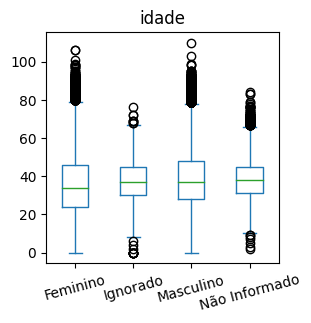

In [58]:
#Tratado!
acidentes.plot.box(column="idade", by='sexo', figsize=(3, 3), rot=15)
plt.show()

Sem tratamento

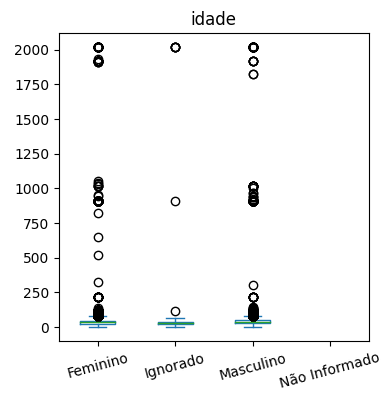

####**<font color=#FE8202> 4.1.3 Tratamento de Missings**

Missings - São os valores faltantes, e será necessário identifica-los e, em seguida, tratá-los, com um valor adequado.

In [59]:
#Verificando o percentual de registros nulos
(acidentes.isnull().sum()/acidentes.shape[0]*100).round(2)

id                        0.00
data_inversa              0.00
dia_semana                0.00
horario                   0.00
uf                        0.00
br                        0.21
km                        0.21
municipio                 0.00
causa_acidente            0.00
tipo_acidente             0.01
classificacao_acidente    0.00
fase_dia                  0.00
condicao_metereologica    0.00
tipo_pista                0.00
tracado_via               0.00
tipo_veiculo              0.00
tipo_envolvido            0.00
estado_fisico             0.00
idade                     0.00
sexo                      0.00
ilesos                    0.00
feridos_leves             0.00
feridos_graves            0.00
mortos                    0.00
latitude                  0.00
longitude                 0.00
dtype: float64

Os atributos nulos, somados, representam 0,45% do dataset.
>
É praticamente impercepitível na visualização matricial da nulidade do dataset.

<Axes: >

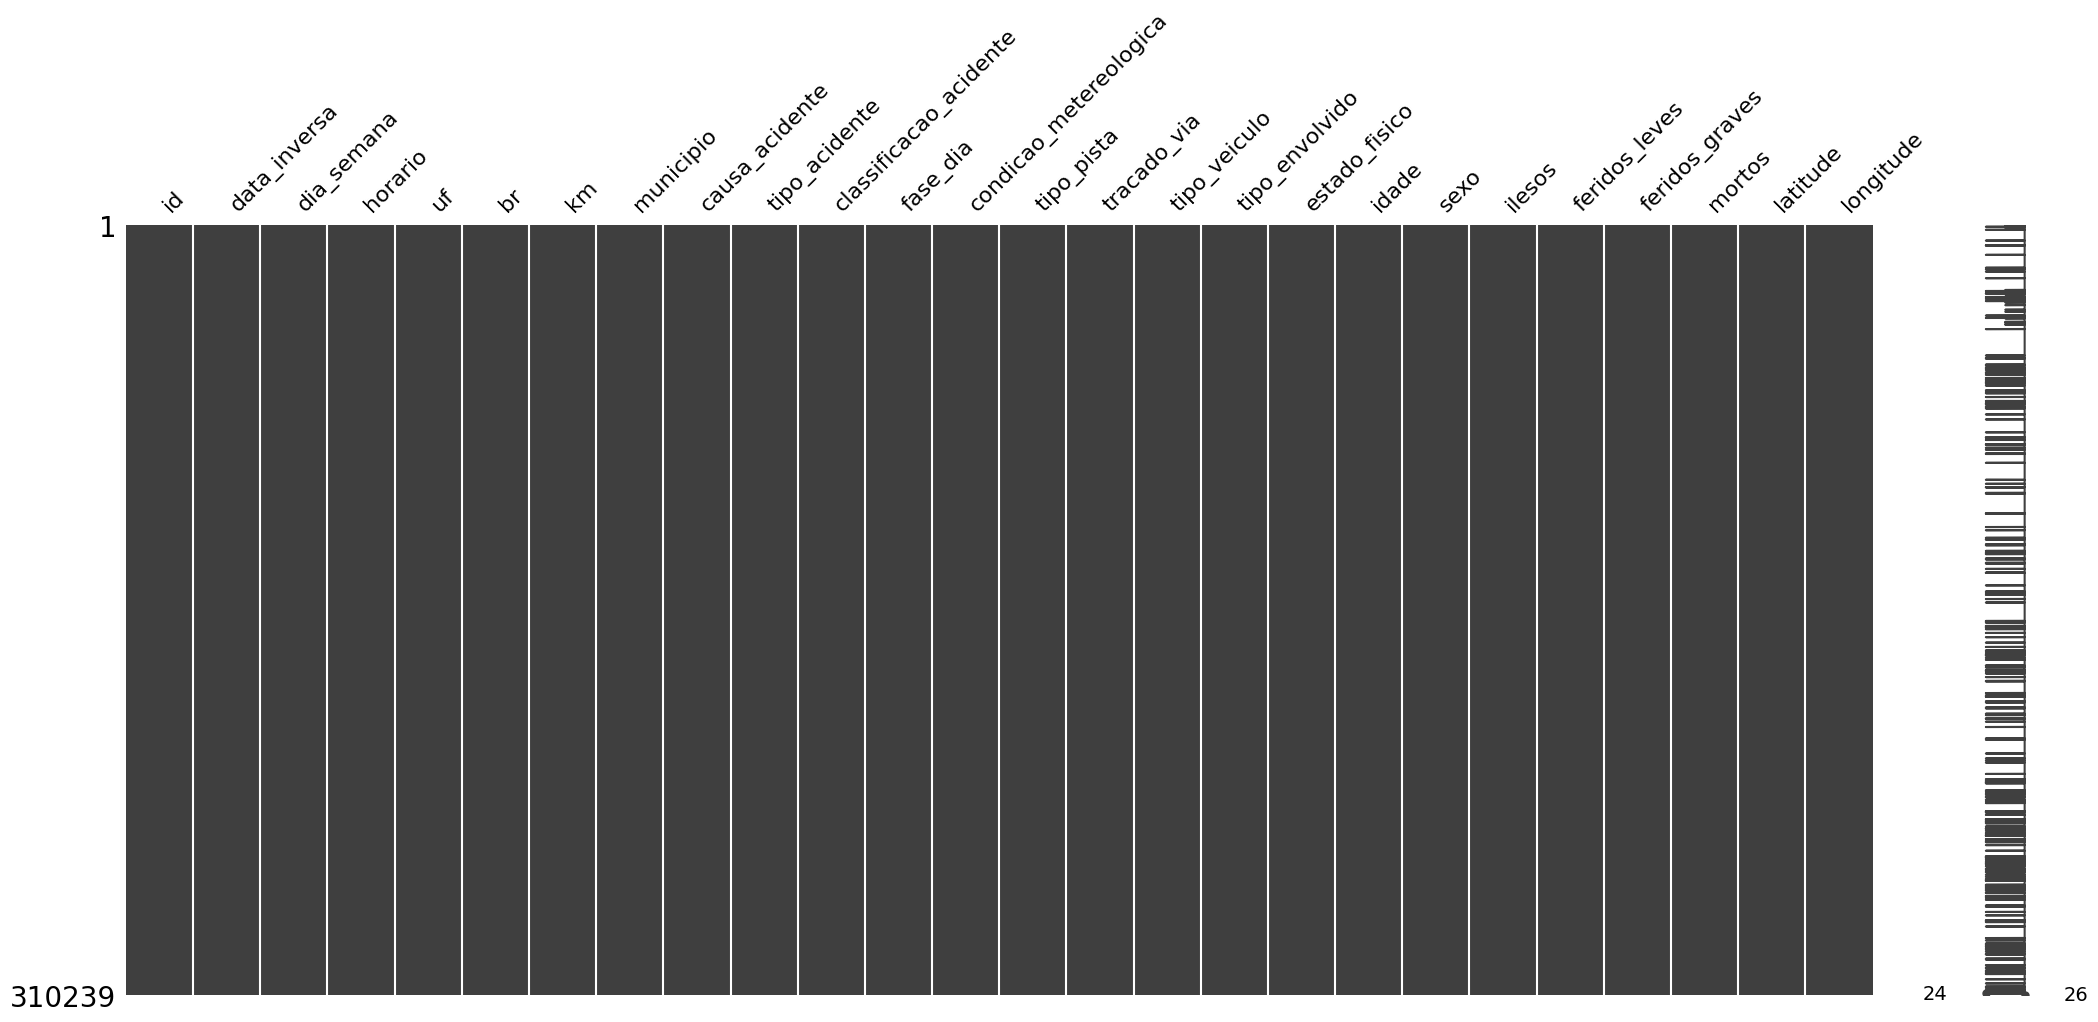

In [60]:
ms.matrix(acidentes)

Mas, mesmo assim, não iremos excluir esses registros, para os atributos KM e BR. Iremos substituir por zero.
>
E o atributo tipo_acidente iremos substituir por 'Não Informado'.

In [61]:
# substituindo os NaN de KM e BR por 0
acidentes['km'].fillna(0, inplace=True)
acidentes['br'].fillna(0, inplace=True)

# substituindo os NaN de tipo_acidente por 'Não Informado'
acidentes['tipo_acidente'].fillna('Não Informado', inplace=True)

In [62]:
# Agora que o atributo BR não tem missings, iremos converter de float para int
acidentes['br'] = acidentes['br'].astype(int)

Pronto, sem missings.

In [63]:
acidentes.isnull().sum()

id                        0
data_inversa              0
dia_semana                0
horario                   0
uf                        0
br                        0
km                        0
municipio                 0
causa_acidente            0
tipo_acidente             0
classificacao_acidente    0
fase_dia                  0
condicao_metereologica    0
tipo_pista                0
tracado_via               0
tipo_veiculo              0
tipo_envolvido            0
estado_fisico             0
idade                     0
sexo                      0
ilesos                    0
feridos_leves             0
feridos_graves            0
mortos                    0
latitude                  0
longitude                 0
dtype: int64

####**<font color=#FE8202> 4.1.4 Outros**

Agora vou tratar o atributo sexo, pois foi verificado os valores de "Não Informado" e "Ignorado".
>
Vamos utilizar a distribuição de Bernoulli, nome dado em homenagem ao cientista suíço Jakob Bernoulli.
>
É a distribuição discreta de espaço amostral {0, 1}, que tem valor 1 com a probabilidade de sucesso p e valor 0 com a probabilidade de falha.

In [65]:
# Verificando o percentual da distribuição
acidentes.sexo.value_counts(normalize=True) 

Masculino        0.711545
Feminino         0.220269
Não Informado    0.062326
Ignorado         0.005860
Name: sexo, dtype: float64

Como temos cerca de 70% de vitimas do sexo Masculino nos valores conhecidos, iremos utilizar o parâmetro de sucesso P = 0.7.

In [69]:
#Vamos criar o atributo "sexo_tratado"
acidentes['sexo_tratado'] = acidentes['sexo']

In [70]:
#Para percorrer cada registro do dataframe, criamos o laço de repetição FOR
#Dentro desse laço, uma condição de IF, para testar o atributo.
#Caso seja Ignorado ou Não Informado, aplicar Bernoulli, se não, preenche com o sexo do proprio registro

for i in range(len(acidentes)):
  if ((acidentes['sexo'][i] == 'Ignorado') | (acidentes['sexo'][i] == 'Não Informado')) :
    acidentes['sexo_tratado'][i] = (bernoulli.rvs(size=1,p=0.7)).astype(int) 
  else:
    acidentes['sexo_tratado'][i] = acidentes['sexo'][i]

Por ser uma distribuição binária, seu resultado é 1 ou 0, sendo assim, devemos substituir 1 por Masculino e 0 para Feminino.

In [74]:
acidentes.loc[acidentes.sexo_tratado==1,'sexo_tratado']='Masculino'
acidentes.loc[acidentes.sexo_tratado==0,'sexo_tratado']='Feminino'

In [75]:
acidentes.sexo_tratado.value_counts().map('{:,d}'.format)

Masculino    235,495
Feminino      74,744
Name: sexo_tratado, dtype: object

In [76]:
# Verificando o percentual da distribuição
acidentes.sexo_tratado.value_counts(normalize=True) 

Masculino    0.759076
Feminino     0.240924
Name: sexo_tratado, dtype: float64

In [77]:
#Excluindo a redundância do atributo sexo, ficando apenas com o sexo_tratado
acidentes.drop(['sexo'],	axis=1, inplace = True)

###**<font color=#FE8202> 4.2 Criação de recursos**

Também conhecida como ***feature engineering***, a criação de recursos consiste em criar, a partir dos atributos originais, um conjunto de atributos que capture informações importantes.

####**<font color=#FE8202> 4.2.1 Enriquecimento**

Iremos enriquecer o nosso dataset, adicionando a informação das regiões do Brasil, que são os agrupamentos das unidades da federação em regiões com o propósito de ajudar interpretações estatísticas.
>
Na etapda de carga de dados criamos o dataset estados_br, e agora iremos fazer um "merge" com o dataset de acidentes para enriquecimento.



In [ ]:
#Merge dos dataframes. Obs: Por default, a junção é INNER JOIN.
acidentes = pd.merge(acidentes, estados_br, left_on=['uf'], right_on=['uf'])

In [ ]:
# distribuição
acidentes.groupby('regiao').size().sort_values(ascending=False)

regiao
Sudeste         93604
Sul             91680
Nordeste        67971
Centro-Oeste    38313
Norte           18671
dtype: int64

####**<font color=#FE8202> 4.2.2 Construção de recursos**

> Data e tempo

A partir do atributo data_inversa e horario, iremos construir atributos derivados dessa junção, que irá facilitar a visualização dos dados. São eles:
>
ano = ano do acidente
>
mes = mês do acidente
>
hora = extrai "Hora" do horario completo HH:MM:SS
>
ano_mes = ano e mês do acidente
>
semana = valor inteiro que representa o dia da semana

In [ ]:
#criando o atributo data_hora, concatenando data_inversa com horario
acidentes['data_hora'] = acidentes['data_inversa'].map(str) + ' ' + acidentes['horario']

#convertendo para datetime
acidentes['data_hora'] = pd.to_datetime(acidentes['data_hora'])

#Extraindo ano, mes, hora, ano_mes e semana
acidentes['ano'] = acidentes['data_hora'].dt.year
acidentes['mes'] = acidentes['data_hora'].dt.month
acidentes['hora'] = acidentes['data_hora'].dt.hour
acidentes['ano_mes'] = acidentes['data_hora'].dt.strftime('%Y-%m')
acidentes['semana'] = acidentes['data_hora'].dt.weekday 

In [ ]:
#excluir as colunas que não iremos mais utilizar, evitando a redendância de informação
acidentes.drop([ 'horario','dia_semana','data_hora'],	axis=1, inplace = True)

In [72]:
#Verificando os recursos criados
acidentes.groupby(["ano","mes","ano_mes","hora","semana"])['id'].count().reset_index()

,ano,mes,ano_mes,hora,semana,id
0,2019,1,2019-01,0,0,43
1,2019,1,2019-01,0,1,34
2,2019,1,2019-01,0,2,25
3,2019,1,2019-01,0,3,33
4,2019,1,2019-01,0,4,31
...,...,...,...,...,...,...
4027,2020,12,2020-12,23,2,43
4028,2020,12,2020-12,23,3,44
4029,2020,12,2020-12,23,4,60
4030,2020,12,2020-12,23,5,94




---



> Faixa de idade

In [87]:
# Definindo o nome das faixa
faixa = ['0 a 4','5 a 9','10 a 14','15 a 19','20 a 24','25 a 29','30 a 34','35 a 39',
          '40 a 44','45 a 49','50 a 54','55 a 59','60 a 64','65 a 69','70 a 74',
          '75 a 79','80 a 84','85 a 89','90 a 94','95 a 99','100 ou mais']

# Definindo o intervalo das faixas
intervalo = [-1,4,9,14,19,24,29,34,39,44,49,54,59,64,69,74,79,84,89,94,99,200]

classes = pd.cut(x=acidentes.idade, labels=faixa, bins=intervalo)
acidentes['faixa_idade'] = classes  

In [86]:
#Verificando os recursos criados
acidentes.groupby(["faixa_idade"])['id'].count().reset_index()

,faixa_idade,id
0,0 a 4,2950
1,5 a 9,3516
2,10 a 14,3844
3,15 a 19,10929
4,20 a 24,33731
5,25 a 29,39030
6,30 a 34,41762
7,35 a 39,42249
8,40 a 44,36819
9,45 a 49,28988


In [134]:
idade_fx.to_csv("idadel.csv")

####**<font color=#FE8202> 4.x Agregação**

Agregação consiste em combinar dois ou mais objetos em um único.
>
O nosso dataset, detalha o acidente por pessoas envolvidas, ou seja, para um registro de acidente, posso ter mais de uma linha.
>
Vamos criar um dataset agregado com a visão de quantidade de acidentes, agrupandos os atributos que não se repetem.
>
Assim, será possivel fazer analises na visão de acidente.

In [ ]:
acidentes.head(5)

In [ ]:
df = (acidentes.groupby(['ano','uf'])['id'].nunique()).reset_index()
df



---



---



---



In [ ]:
bernou = acidentes[['sexo']].head(10000)


Masculino        8,752
Não Informado      794
Feminino           339
Ignorado           115
Name: sexo, dtype: object

In [ ]:
bernou['sexo_tratado'] = bernou['sexo']

In [ ]:
for i in range(len(bernou)):
  if bernou['sexo'][i] == 'Ignorado':
    bernou['sexo_tratado'][i] = (bernoulli.rvs(size=1,p=0.5)).astype(int)
  else:
    bernou['sexo_tratado'][i] = bernou['sexo'][i]

In [ ]:
bernou.sexo_tratado.value_counts().map('{:,d}'.format) 

Masculino        8,816
Não Informado      794
Feminino           339
[0]                 51
Name: sexo_tratado, dtype: object

In [ ]:
bernou[bernou['sexo_tratado'] == 1]

In [ ]:
bernou.loc[bernou.sexo_tratado==1,'sexo_tratado']='Masculino'
bernou[bernou['sexo_tratado'] == 1]

#**<font color=#FE8202> 5. Análise de Dados**

#**<font color=#FE8202> 6. Modelo de Machine Learning**

#Rascunho


In [ ]:
from sklearn.impute import SimpleImputer
media_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [ ]:
acidentes.idade = media_imputer.fit_transform(acidentes[['idade']])

In [ ]:
# Tratando missing
acidentes['idade'].fillna(acidentes['idade'].mean(), inplace=True)



---

